In [108]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from matplotlib.transforms import Bbox
from statsmodels.graphics.tsaplots import plot_acf
import datetime as dt
from statsmodels.tsa.stattools import adfuller
import math
import pmdarima as pm
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#loading data into a dataframe

bitcoin = pd.read_csv('C:/Users/SINGAPORE TRADERS/Desktop/FYP/BADGER-USD.csv')

In [3]:
bitcoin.head()

,timestamp,adjclose,close,high,volume,open,low
0,2020-12-04 00:00:00,4.485512,4.485512,8.270815,3485132,6.335201,4.422854
1,2020-12-05 00:00:00,3.643699,3.643699,4.483955,2418562,4.483955,2.771081
2,2020-12-06 00:00:00,9.195665,9.195665,9.258212,9940259,3.644278,3.528163
3,2020-12-07 00:00:00,6.317369,6.317369,9.303017,3261255,9.203286,6.144603
4,2020-12-08 00:00:00,6.545083,6.545083,7.108138,2627670,6.313554,5.919826


In [4]:
bitcoin.tail()

,timestamp,adjclose,close,high,volume,open,low
659,2022-09-24 00:00:00,3.541787,3.541787,3.751263,3728406,3.751263,3.521646
660,2022-09-25 00:00:00,3.474397,3.474397,3.623322,3209986,3.542701,3.452177
661,2022-09-26 00:00:00,3.587838,3.587838,3.589451,4441821,3.472794,3.407857
662,2022-09-27 00:00:00,3.478104,3.478104,3.743190,5213494,3.586237,3.431813
663,2022-09-28 08:58:00,3.397093,3.397093,3.482857,4104136,3.478616,3.349850


In [5]:
#checking if there is any null value

bitcoin.isnull().sum()

timestamp    0
adjclose     0
close        0
high         0
volume       0
open         0
low          0
dtype: int64

In [6]:
#checking difference betweek adjclose and close

np.sum(bitcoin['close'] - bitcoin['adjclose'])

0.0

In [7]:
#dividing timestamp into date and time features

bitcoin['date'] =  pd.DatetimeIndex(bitcoin['timestamp']).date
bitcoin['time'] =  pd.DatetimeIndex(bitcoin['timestamp']).time

In [8]:
bitcoin

,timestamp,adjclose,close,high,volume,open,low,date,time
0,2020-12-04 00:00:00,4.485512,4.485512,8.270815,3485132,6.335201,4.422854,2020-12-04,00:00:00
1,2020-12-05 00:00:00,3.643699,3.643699,4.483955,2418562,4.483955,2.771081,2020-12-05,00:00:00
2,2020-12-06 00:00:00,9.195665,9.195665,9.258212,9940259,3.644278,3.528163,2020-12-06,00:00:00
3,2020-12-07 00:00:00,6.317369,6.317369,9.303017,3261255,9.203286,6.144603,2020-12-07,00:00:00
4,2020-12-08 00:00:00,6.545083,6.545083,7.108138,2627670,6.313554,5.919826,2020-12-08,00:00:00
...,...,...,...,...,...,...,...,...,...
659,2022-09-24 00:00:00,3.541787,3.541787,3.751263,3728406,3.751263,3.521646,2022-09-24,00:00:00
660,2022-09-25 00:00:00,3.474397,3.474397,3.623322,3209986,3.542701,3.452177,2022-09-25,00:00:00
661,2022-09-26 00:00:00,3.587838,3.587838,3.589451,4441821,3.472794,3.407857,2022-09-26,00:00:00
662,2022-09-27 00:00:00,3.478104,3.478104,3.743190,5213494,3.586237,3.431813,2022-09-27,00:00:00


In [9]:
bitcoin.drop('timestamp',axis=1,inplace = True)

In [10]:
bitcoin

,adjclose,close,high,volume,open,low,date,time
0,4.485512,4.485512,8.270815,3485132,6.335201,4.422854,2020-12-04,00:00:00
1,3.643699,3.643699,4.483955,2418562,4.483955,2.771081,2020-12-05,00:00:00
2,9.195665,9.195665,9.258212,9940259,3.644278,3.528163,2020-12-06,00:00:00
3,6.317369,6.317369,9.303017,3261255,9.203286,6.144603,2020-12-07,00:00:00
4,6.545083,6.545083,7.108138,2627670,6.313554,5.919826,2020-12-08,00:00:00
...,...,...,...,...,...,...,...,...
659,3.541787,3.541787,3.751263,3728406,3.751263,3.521646,2022-09-24,00:00:00
660,3.474397,3.474397,3.623322,3209986,3.542701,3.452177,2022-09-25,00:00:00
661,3.587838,3.587838,3.589451,4441821,3.472794,3.407857,2022-09-26,00:00:00
662,3.478104,3.478104,3.743190,5213494,3.586237,3.431813,2022-09-27,00:00:00


In [11]:
#checking if there is ant repition in dates

date_repeat = bitcoin.duplicated(subset=['date']).any()
print(date_repeat)

False


In [12]:
# time is always same other than the last column

time_repeat = bitcoin.duplicated(subset=['time']).any()
print(time_repeat)

True


In [13]:
time_dup = bitcoin.pivot_table(columns=['time'], aggfunc='size')
print (time_dup)

time
00:00:00    663
08:58:00      1
dtype: int64


In [14]:
bitcoin

,adjclose,close,high,volume,open,low,date,time
0,4.485512,4.485512,8.270815,3485132,6.335201,4.422854,2020-12-04,00:00:00
1,3.643699,3.643699,4.483955,2418562,4.483955,2.771081,2020-12-05,00:00:00
2,9.195665,9.195665,9.258212,9940259,3.644278,3.528163,2020-12-06,00:00:00
3,6.317369,6.317369,9.303017,3261255,9.203286,6.144603,2020-12-07,00:00:00
4,6.545083,6.545083,7.108138,2627670,6.313554,5.919826,2020-12-08,00:00:00
...,...,...,...,...,...,...,...,...
659,3.541787,3.541787,3.751263,3728406,3.751263,3.521646,2022-09-24,00:00:00
660,3.474397,3.474397,3.623322,3209986,3.542701,3.452177,2022-09-25,00:00:00
661,3.587838,3.587838,3.589451,4441821,3.472794,3.407857,2022-09-26,00:00:00
662,3.478104,3.478104,3.743190,5213494,3.586237,3.431813,2022-09-27,00:00:00


In [15]:
#making a shallow copy of dataframe

btc_df = bitcoin.copy()

In [16]:
#setting index as date and dropping date and time columns

btc_df.index = btc_df['date']
btc_df.drop(columns=['time','date'],inplace = True)

In [17]:
btc_df

,adjclose,close,high,volume,open,low
date,,,,,,
2020-12-04,4.485512,4.485512,8.270815,3485132,6.335201,4.422854
2020-12-05,3.643699,3.643699,4.483955,2418562,4.483955,2.771081
2020-12-06,9.195665,9.195665,9.258212,9940259,3.644278,3.528163
2020-12-07,6.317369,6.317369,9.303017,3261255,9.203286,6.144603
2020-12-08,6.545083,6.545083,7.108138,2627670,6.313554,5.919826
...,...,...,...,...,...,...
2022-09-24,3.541787,3.541787,3.751263,3728406,3.751263,3.521646
2022-09-25,3.474397,3.474397,3.623322,3209986,3.542701,3.452177
2022-09-26,3.587838,3.587838,3.589451,4441821,3.472794,3.407857


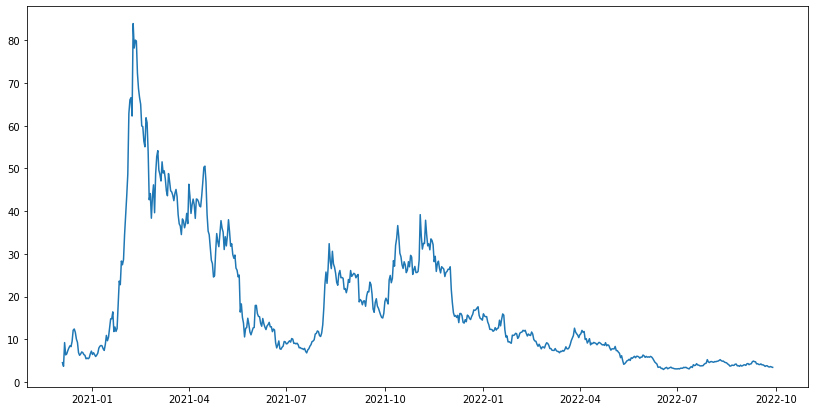

In [18]:
#plotting trend of closing prices

plt.figure(figsize=(14,7))
plt.plot(btc_df['adjclose'], label='BADGER-USD value')

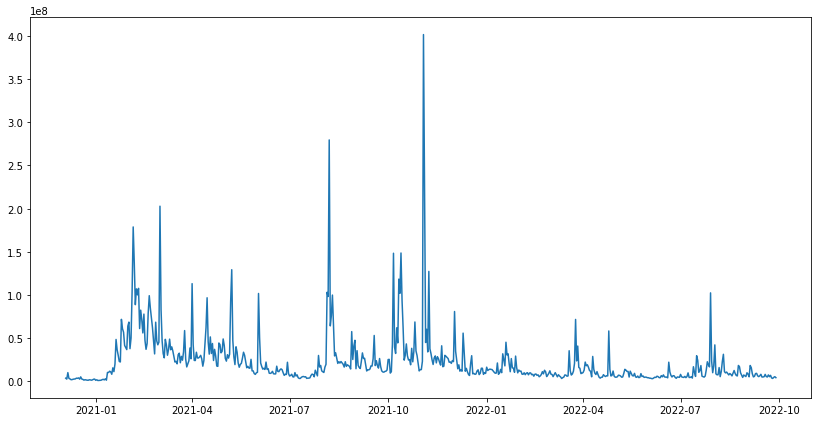

In [19]:
# plotting trend of volume if there is any realation between prices and volumne

plt.figure(figsize=(14,7))
plt.plot(btc_df['volume'], label='BADGER-USD value')

In [20]:
#dividing data of 2021 and 2022

bitcoin['year'] = pd.DatetimeIndex(bitcoin['date']).year
bitcoin['month'] = pd.DatetimeIndex(bitcoin['date']).month
prices_2021 = bitcoin[((bitcoin['year'] > 2020) & (bitcoin['year'] < 2022))]
prices_2022 = bitcoin[(bitcoin['year'] > 2021)]

In [21]:
prices_2021 = prices_2021.groupby('month')['adjclose'].mean().to_dict()
prices_2022 = prices_2022.groupby('month')['adjclose'].mean().to_dict()

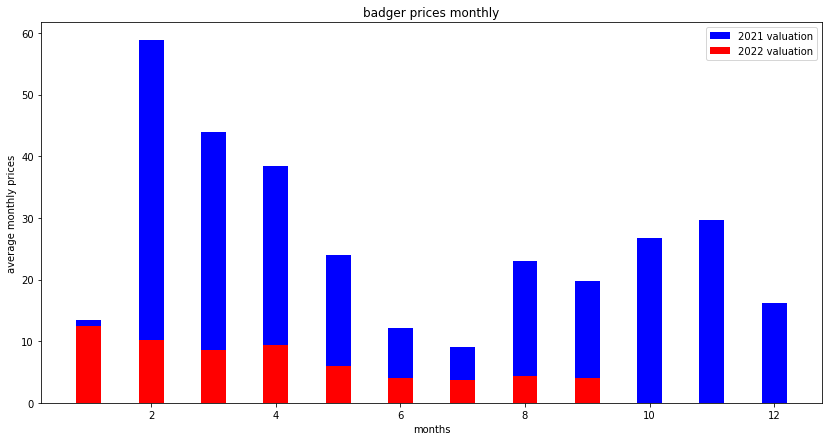

In [22]:
#comparing closing prices of 2021 and 2022

value = list(prices_2021.values())
value2 = list(prices_2022.values())
plt.figure(figsize=(14,7))
plt.bar(list(prices_2021.keys()),value,color='blue',width=0.4,label='2021 badger prices')
plt.bar(list(prices_2022.keys()),value2,color='red',width=0.4,label='2022 badger prices')
plt.title('badger prices monthly')
plt.ylabel('average monthly prices')
plt.xlabel('months')
plt.legend(['2021 valuation','2022 valuation'])

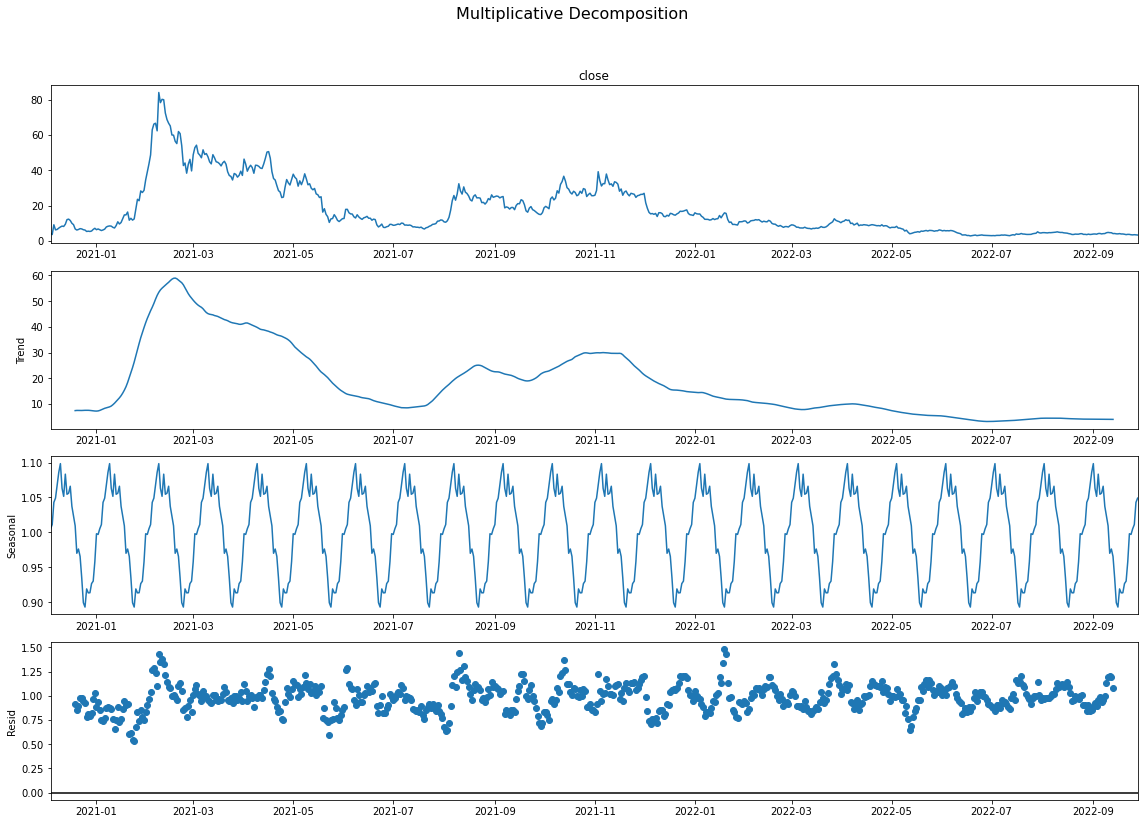

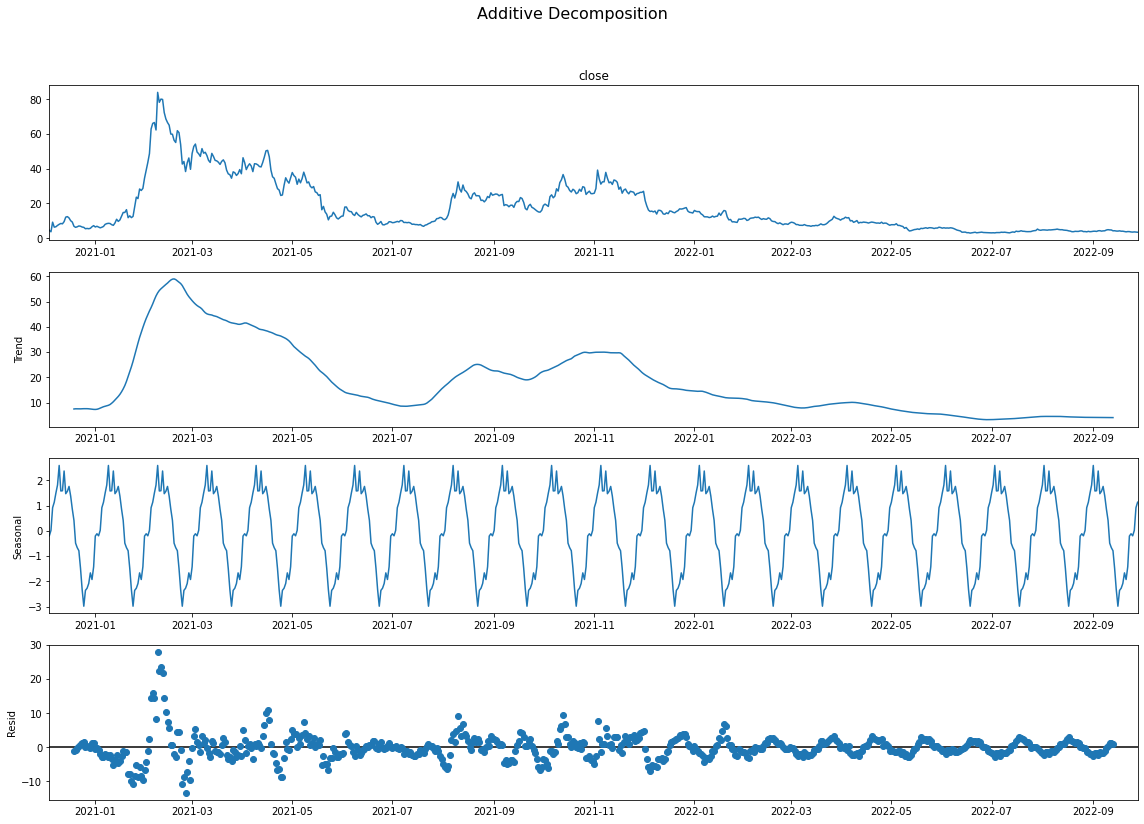

In [23]:
#plotting seasonality graph and setting period as 30 for a period of 1 month

multiplicative_decomposition = seasonal_decompose(btc_df['close'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(btc_df['close'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

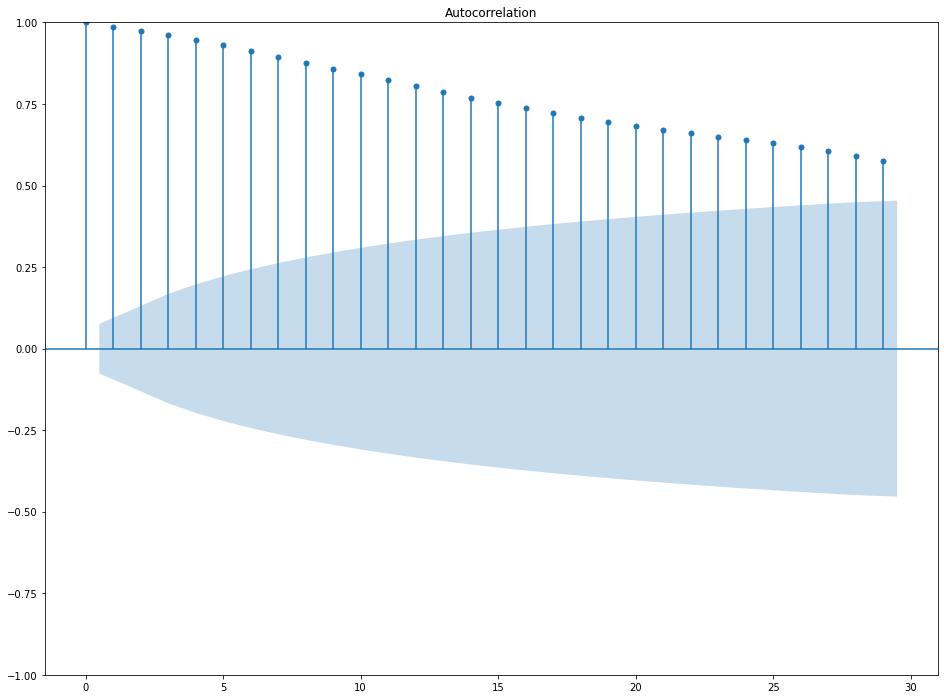

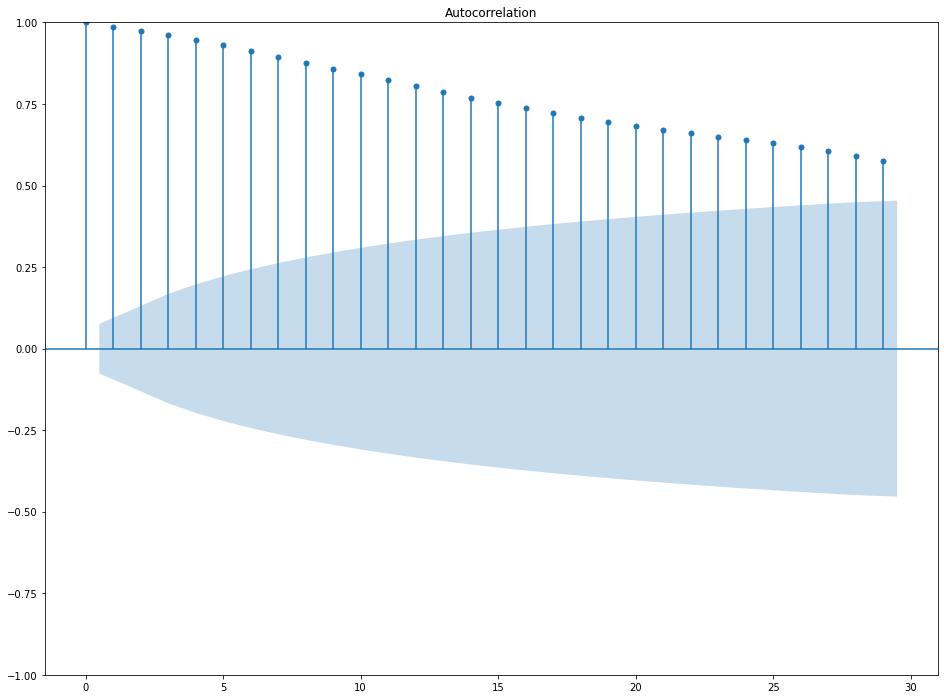

In [24]:
# plotting autocorrelation

plot_acf(btc_df['close'])

In [25]:
# applying ducky fuller test data in non stationary

adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(btc_df['close'])
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -2.301729499299868
ADF p-values: 0.17141078030008905
ADF number of lags used: 8
ADF number of observations: 655
ADF critical values: {'1%': -3.4403730727154724, '5%': -2.86596268312982, '10%': -2.569125249694074}
ADF best information criterion: 2846.9088332889155


<AxesSubplot:xlabel='date'>

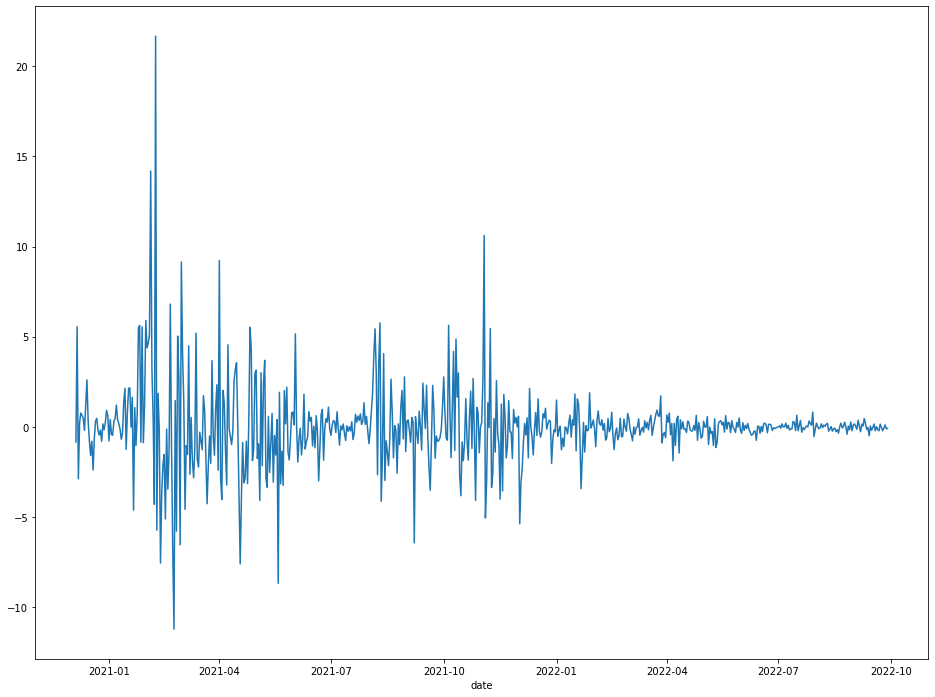

In [26]:
#applying differencing method

prev_df = btc_df.close.shift()
diff_df = btc_df.close - prev_df
diff_df.plot()

In [27]:
btc_df['close_diff'] = btc_df['close'] - btc_df['close'].shift(1)

In [28]:
# applying ducky fuller test data in now stationary

adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(btc_df['close_diff'].dropna())
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -6.195491789192735
ADF p-values: 5.979513752367897e-08
ADF number of lags used: 20
ADF number of observations: 642
ADF critical values: {'1%': -3.4405768522418607, '5%': -2.8660524488494903, '10%': -2.569173076930542}
ADF best information criterion: 2845.0398021182355


In [29]:
btc_df['close_diff'][0] = 0

C:\Users\SINGAPORE TRADERS\AppData\Local\Temp\ipykernel_11436\1005278455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_df['close_diff'][0] = 0


In [30]:
btc_df.drop('adjclose',inplace=True,axis=1)

In [31]:
btc_df

,close,high,volume,open,low,close_diff
date,,,,,,
2020-12-04,4.485512,8.270815,3485132,6.335201,4.422854,0.000000
2020-12-05,3.643699,4.483955,2418562,4.483955,2.771081,-0.841813
2020-12-06,9.195665,9.258212,9940259,3.644278,3.528163,5.551966
2020-12-07,6.317369,9.303017,3261255,9.203286,6.144603,-2.878296
2020-12-08,6.545083,7.108138,2627670,6.313554,5.919826,0.227714
...,...,...,...,...,...,...
2022-09-24,3.541787,3.751263,3728406,3.751263,3.521646,-0.211623
2022-09-25,3.474397,3.623322,3209986,3.542701,3.452177,-0.067390
2022-09-26,3.587838,3.589451,4441821,3.472794,3.407857,0.113441


In [71]:
#creating X feature for input to model

months = [x.month for x in btc_df.index]
#months = np.array(months)
#months.reshape(-1,1)
years = [x.year for x in btc_df.index]
#years = np.array(years)
#years.reshape(-1,1)
day = [x.day for x in btc_df.index]
#day = np.array(day)
#day.reshape(-1,1)

In [80]:
X = np.array((years,months,day)).T
y = np.array(btc_df['close_diff'])

In [81]:
X

array([[2020,   12,    4],
       [2020,   12,    5],
       [2020,   12,    6],
       ...,
       [2022,    9,   26],
       [2022,    9,   27],
       [2022,    9,   28]])

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

date
2020-12-04    0.000000
2020-12-05   -0.841813
2020-12-06    5.551966
2020-12-07   -2.878296
2020-12-08    0.227714
                ...   
2022-09-24   -0.211623
2022-09-25   -0.067390
2022-09-26    0.113441
2022-09-27   -0.109734
2022-09-28   -0.081011
Name: close_diff, Length: 664, dtype: float64

In [106]:
# training the model

model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [113]:
#getting the root mean square error

prediction = model.predict(X_test)
MSE = mean_squared_error(y_test, prediction)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

2.996795014186056


In [116]:
model.fit(X,btc_df.close_diff)
pred2 = model.predict(X)

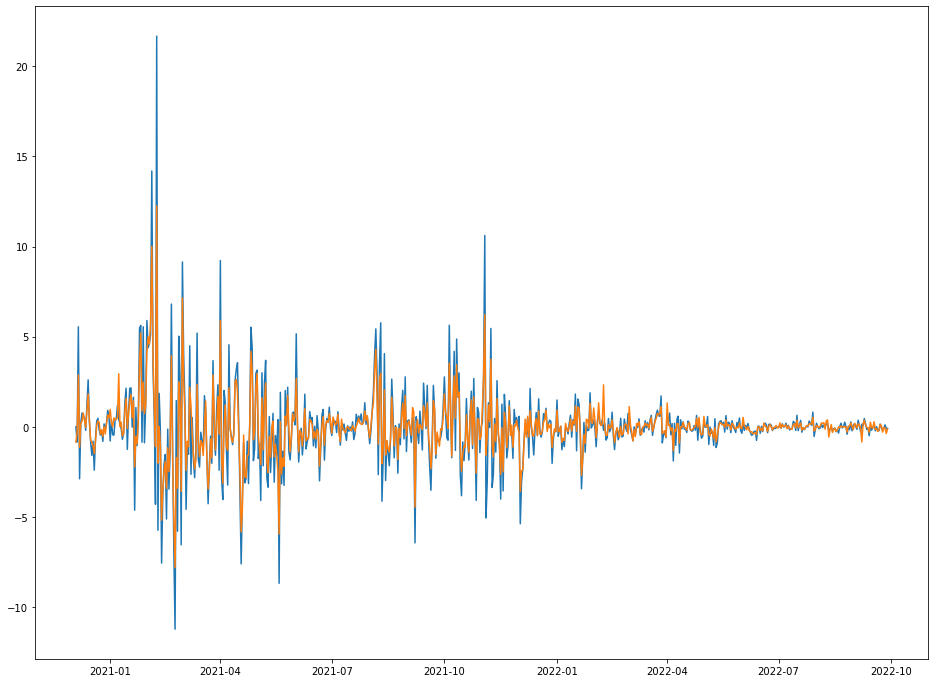

In [117]:
# graph between actutal and predicted data

plt.plot(btc_df.index, btc_df.close_diff.values)
plt.plot(btc_df.index,pred2)